# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [18]:
import numpy as np


def triangle_area_heron(a, b, c):
    
    s = ((a + b) + c)/2
    
    area = np.sqrt(s(s - a) * (s - b) * (s - c))
    
    return area

An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [19]:
import numpy as np


def triangle_area_kahan(a, b, c):
    
    area = 1/4 * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))
    
    return area

**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

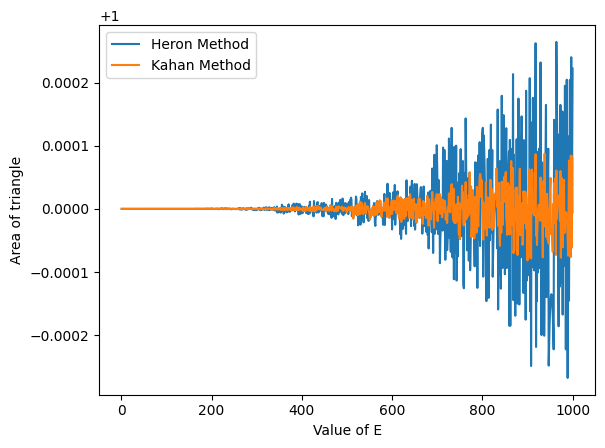

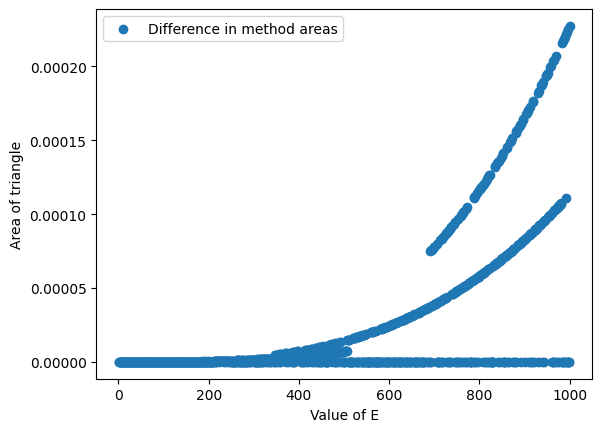

Heron Method = 1.000222061319621, Kahan Method = 0.9999947122858124


In [20]:
import numpy as np
import matplotlib.pyplot as plt


def triangle_area_heron(a, b, c):
    
    s = ((a + b) + c)/2
    
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))
    
    return area

def triangle_area_kahan(a, b, c):
    
    area = 1/4 * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))
    
    return area


def compar(start,end,steps):

    e = np.linspace(start,end,steps)

    tH = []
    tK = []
    dif = []
     
    for i in range(len(e)):
        a = 2 * e[i]
        b = np.sqrt(1 + e[i]**4)/e[i]
        c = b
        
        tH += [triangle_area_heron(a,b,c)]
        
        tK += [triangle_area_kahan(a,b,c)]

        dif += [np.absolute(triangle_area_heron(a,b,c) - triangle_area_kahan(a,b,c))]

    plt.plot(e, tH, label = 'Heron Method')
    plt.plot(e, tK, label = 'Kahan Method')
    plt.legend()
    plt.xlabel('Value of E')
    plt.ylabel('Area of triangle')
    plt.show()

    plt.scatter(e, dif, label = 'Difference in method areas')
    plt.legend()
    plt.xlabel('Value of E')
    plt.ylabel('Area of triangle')
    plt.show()


def investigate(e):

    a = 2 * e
    b = np.sqrt(1 + e**4)/e
    c = b

    print(f'Heron Method = {triangle_area_heron(a,b,c)}, Kahan Method = {triangle_area_kahan(a,b,c)}')


compar(1,1000,1000)
investigate(1000)



## Discussion
Firstly its apparent that a triangle of this nature will always have an area approximately equal to one however, its clear that for larger $\epsilon$ these methods struggle to agree on one value.

We see that as the value of $\epsilon$ increases, the difference between the areas given by the Kahan and Heron method increases exponentially indicating towards some sort of error.
It turns out that this discrepancy is due to "rounding errors" which occur in both methods, but have more of an effect in the Heron method due to the nature of the calculations it requires.

The Kahan method is a rearranged version of the Heron method which reduces the amount of subtraction of numbers that are nearly equal, allowing it to provide a more accurate area.





## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [21]:
import numpy as np


def sequence_element(n):
    #xArr = np.zeros(n,dtype=list)
    x = np.array([[1],[1]])
    
    A = np.array([[0,1],[1,1]])

    
    for i in range(n):

        x = np.dot(A, x)
        
    return x

print(sequence_element(10))

[[ 89]
 [144]]


**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

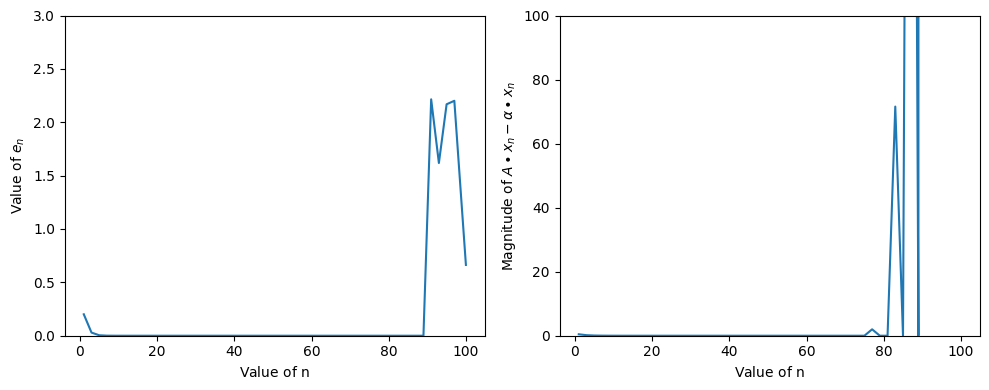

In [22]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

def sequence_element(n):
    #xArr = np.zeros(n,dtype=list)
    x = np.array([[1],[1]])
    
    A = np.array([[0,1],[1,1]])

    
    for i in range(n):

        x = np.dot(A, x)
        
    return x

def e_n(n):

    A = np.array([[0,1],[1,1]])

    xn = sequence_element(n)

    alph = sc.linalg.eigh(A, eigvals_only=True)[1]
    

    e = np.linalg.norm(np.dot(A , xn) - alph * xn) / np.linalg.norm(xn)

    return(e)

def e_graph(start,end):
    A = np.array([[0,1],[1,1]])

    alph = sc.linalg.eigh(A, eigvals_only=True)[1]

    n = np.linspace(start,end, dtype = int)
    
    e_ns = []
    x_ns = []
    andifs = []
    
     
    for i in range(len(n)):
        
        e_ns += [e_n(n[i])]


        andifs += [np.linalg.norm(np.dot(A , sequence_element(n[i])) - alph * sequence_element(n[i]))]

    

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
                                   
    
    ax1.plot(n, e_ns, label='Error Value')
    ax1.set_xlabel(r'Value of $\text{n}$')
    ax1.set_ylabel(r'Value of $e_n$')
    ax1.set_ylim(0,3)
    
    ax2.plot(n, andifs,)
    ax2.set_xlabel(r'Value of $\text{n}$')
    ax2.set_ylabel(r'Magnitude of $A \bullet x_n - \alpha \bullet x_n$')
    ax2.set_ylim(0,100)
    
    




    plt.tight_layout()
    plt.show()

    

e_graph(1,100)

    

## Discussion

We are investigating the value of $e_n$, which is the magnitude of the difference between $A \bullet x_n$ and $\alpha \bullet x_n$ over the magnitude of $x_n$.


Where A = $\begin{bmatrix} 0 & 1 \\ 1 & 1 \end{bmatrix}$ and $x_{n+1}$ = $A \bullet x_n$ for $n \ge 0$ with $x_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

From our first graph we can see that for values of n less than around 90, $e_n$ stays at zero. Once n is greater than this point, it begins to increase and then varies dramatically.

From our second graph we again see an large growth in $|A \bullet x_n - \alpha \bullet x_n|$, but also encounters large change around $n = 80$. This is again due to rounding error cause by floating point arithmetic

 



## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [23]:
import numpy as np




def intQuad(x):
    def l_v(n, i):

        l_v = np.zeros(n)  
        l_v[i] = 1  
        return l_v

    

    N = len(x)

    
    lCoeffs = [np.polyfit(x, l_v(N, i), N - 1) for i in range(N)]

    
    integrate_coeffs = [np.polyint(P) for P in lCoeffs]

    
    weights = [np.polyval(intP, 1) - np.polyval(intP, -1) for intP in integrate_coeffs]

    return np.array(weights)  


print("Testing Midpoint Rule (N = 1, 1-point quadrature)")
x_m = np.array([0.0])
w_m = intQuad(x_m)
print(f"Computed Midpoint rule weights: {w_m}")
print(f"Expected Value: {np.array([2.0])}")
print(f"Difference: {np.abs(w_m - np.array([2.0]))}\n")

print("Testing Trapezoidal Rule (N = 2, 2-point quadrature)")
x_t = np.array([-1.0, 1.0])
w_t = intQuad(x_t)
print(f"Computed Trapezoidal rule weights: {w_t}")
print(f"Expected: {np.array([1.0, 1.0])}")
print(f"Difference: {np.abs(w_t - np.array([1.0, 1.0]))}\n")

print("Testing Simpson's Rule (N = 3, 3-point quadrature)")
x_s = np.array([-1.0, 0.0, 1.0])
w_s = intQuad(x_s)
print(f"Computed Simpson's rule weights: {w_s}")
print(f"Expected Value: {np.array([1/3, 4/3, 1/3])}")
print(f"Difference: {np.abs(w_s - np.array([1/3, 4/3, 1/3]))}")



# Add test code here

Testing Midpoint Rule (N = 1, 1-point quadrature)
Computed Midpoint rule weights: [2.]
Expected Value: [2.]
Difference: [0.]

Testing Trapezoidal Rule (N = 2, 2-point quadrature)
Computed Trapezoidal rule weights: [1. 1.]
Expected: [1. 1.]
Difference: [0.00000000e+00 2.22044605e-16]

Testing Simpson's Rule (N = 3, 3-point quadrature)
Computed Simpson's rule weights: [0.33333333 1.33333333 0.33333333]
Expected Value: [0.33333333 1.33333333 0.33333333]
Difference: [1.66533454e-16 2.22044605e-16 1.11022302e-16]


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

C:\Users\mclac\AppData\Local\Temp\ipykernel_15532\2190127692.py:18: RankWarning: Polyfit may be poorly conditioned
  lCoeffs = [np.polyfit(x, l_v(N, i), N - 1) for i in range(N)]
C:\Users\mclac\AppData\Local\Temp\ipykernel_15532\2190127692.py:18: RankWarning: Polyfit may be poorly conditioned
  lCoeffs = [np.polyfit(x, l_v(N, i), N - 1) for i in range(N)]
C:\Users\mclac\AppData\Local\Temp\ipykernel_15532\2190127692.py:18: RankWarning: Polyfit may be poorly conditioned
  lCoeffs = [np.polyfit(x, l_v(N, i), N - 1) for i in range(N)]
C:\Users\mclac\AppData\Local\Temp\ipykernel_15532\2190127692.py:18: RankWarning: Polyfit may be poorly conditioned
  lCoeffs = [np.polyfit(x, l_v(N, i), N - 1) for i in range(N)]
C:\Users\mclac\AppData\Local\Temp\ipykernel_15532\2190127692.py:18: RankWarning: Polyfit may be poorly conditioned
  lCoeffs = [np.polyfit(x, l_v(N, i), N - 1) for i in range(N)]
C:\Users\mclac\AppData\Local\Temp\ipykernel_15532\2190127692.py:18: RankWarning: Polyfit may be poorly co

I_estimates: [np.float64(-0.045454545454545456), np.float64(0.25151515151515147), np.float64(-3.3863636363636402), np.float64(-0.1499059561128527), np.float64(0.14002786021438732), np.float64(-0.2255047160345317), np.float64(0.05106060606060711), np.float64(0.678356128526816), np.float64(-1.9205243534729182), np.float64(-0.931569069771337), np.float64(-0.41094706323685076), np.float64(8.009670027894034), np.float64(1.2668988073054848), np.float64(9.380372456888413), np.float64(-11.207172572780557), np.float64(-17.698592079381715), np.float64(-15.384531979664725), np.float64(132.16959674940946), np.float64(29.001481873634162), np.float64(263.9451221016959), np.float64(-195.5446529137887), np.float64(-458.7227717485931), np.float64(-507.35151457136146), np.float64(2819.9864816034224), np.float64(814.3870230025824), np.float64(9528.644004412594), np.float64(-4584.156562207472), np.float64(-13910.145597251598), np.float64(-20011.15036600621), np.float64(72371.15488825999), np.float64(25994

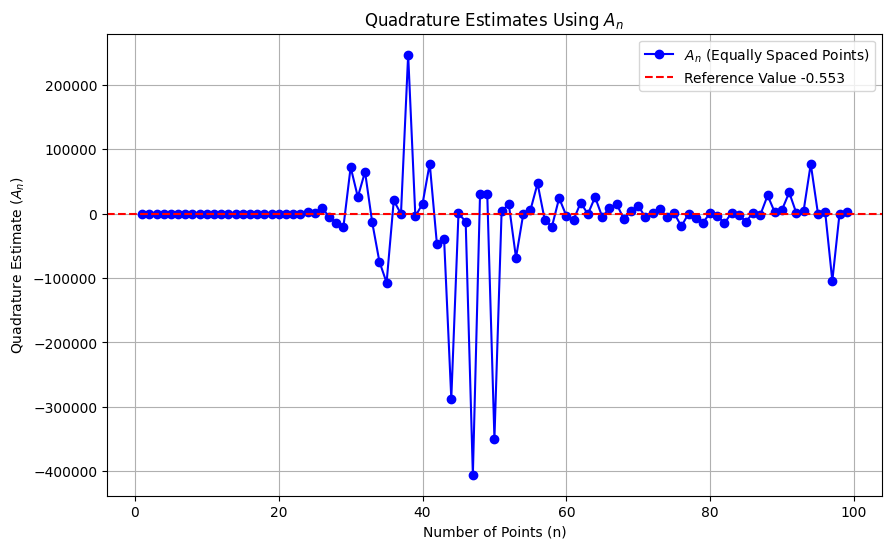

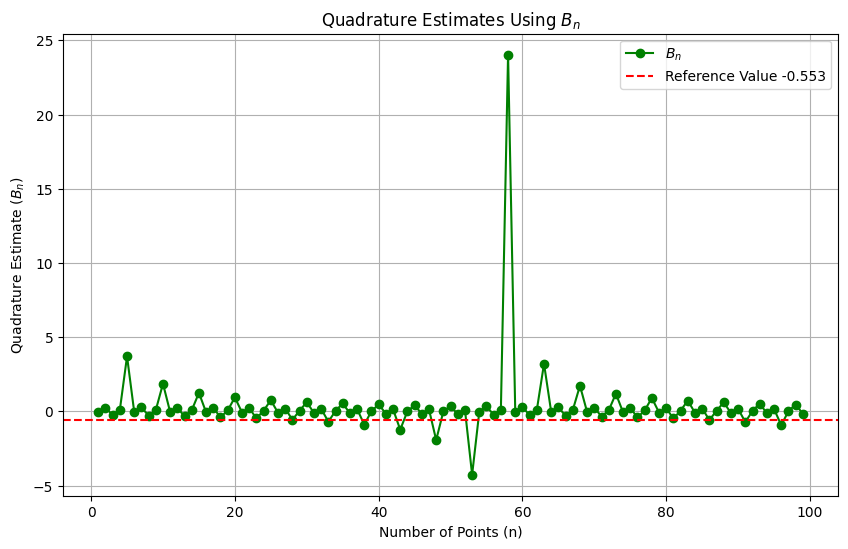

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):

    return 1 / (5 - (7 * x) ** 2)

def compute_quadrature(points):

    weights = intQuad(points)
    return sum(f(x) * w for x, w in zip(points, weights))

def A(N):

    x_0 = [-1 + 2 * i / N for i in range(N + 1)]  
    return compute_quadrature(x_0)

def B(N):

    x_1 = [-np.cos(i * np.pi / N) for i in range(N + 1)] 
    return compute_quadrature(x_1)


actualValue= -0.553  


n = list(range(1, 100))  


A_estimates = [A(n) for n in n]  
B_estimates = [B(n) for n in n]  


print(f"I_estimates: {A_estimates}")
print(f"B_estimates: {B_estimates}")


plt.figure(figsize=(10, 6))
plt.plot(n, A_estimates, marker='o', linestyle='-', color='b', label='$A_n$ (Equally Spaced Points)')
plt.axhline(y=actualValue, color='r', linestyle='--', label=f'Reference Value {actualValue}')
plt.xlabel('Number of Points (n)')
plt.ylabel('Quadrature Estimate ($A_n$)')
plt.title('Quadrature Estimates Using $A_n$')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(n, B_estimates, marker='o', linestyle='-', color='g', label='$B_n$')
plt.axhline(y=actualValue, color='r', linestyle='--', label=f'Reference Value {actualValue}')
plt.xlabel('Number of Points (n)')
plt.ylabel('Quadrature Estimate ($B_n$)')
plt.title('Quadrature Estimates Using $B_n$')
plt.legend()
plt.grid(True)
plt.show()


## Discussion

We are comparing how accurate two quadrature rules are for different values of $n$. We let $A_n$ and $B_n$ denote our two approximations. We calculate our actual value for our integral to be -0.553, and we can use this to gauge how accurate our approximations are. Our two graphs give us a good insight on how accurate they are, and its clear that $B_n$ is the more accurate quadrature rule. 